In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF 
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
def process_data(file_paths):
    # Initialize empty lists to store data
    whisker1_data = []
    whisker2_data = []
    laser1_data = []
    laser2_data = []
    GT1_data = []
    GT2_data = []
    orientation_data = []
    position_data = []

    for file_path in file_paths:
        # Read data from file
        data = pd.read_csv(file_path)
        
        # Extract data columns
        whisker1_data.append(data.iloc[:, :3].values)
        whisker2_data.append(data.iloc[:, 3:6].values)
        laser1_data.append(data.iloc[:, 6].values)
        laser2_data.append(data.iloc[:, 7].values)
        GT1_data.append(data.iloc[:, -2].values)
        GT2_data.append(data.iloc[:, -1].values)
        orientation_data.append(data.iloc[:, 9].values)
        position_data.append(data.iloc[:, 11:13].values)
    
    # Concatenate data from all files
    whisker1_data = np.concatenate(whisker1_data)
    whisker2_data = np.concatenate(whisker2_data)
    laser1_data = np.concatenate(laser1_data)
    laser2_data = np.concatenate(laser2_data)
    GT1_data = np.concatenate(GT1_data)
    GT2_data = np.concatenate(GT2_data)
    orientation_data = np.concatenate(orientation_data)
    position_data = np.concatenate(position_data)
    
    return whisker1_data, whisker2_data, laser1_data, laser2_data, GT1_data, GT2_data, orientation_data, position_data

def filter_data(whisker_data,channel, laser_data, GT_data, threshold, orientation_data, position_data):
    filter_indices = (whisker_data[:,channel-1] >= threshold) & (GT_data > 0)
    whisker_filtered = whisker_data[filter_indices]
    laser_filtered = laser_data[filter_indices]
    GT_filtered = GT_data[filter_indices]
    orientation_filtered = orientation_data[filter_indices]
    position_filtered = position_data[filter_indices]
    return whisker_filtered, laser_filtered, GT_filtered, orientation_filtered, position_filtered

In [3]:
from sklearn.preprocessing import StandardScaler

file_paths = ['0326/data1.csv', '0326/data11.csv', '0326/data3.csv', '0326/data4.csv', 
              '0326/data5.csv', '0326/data6.csv', '0326/data7.csv', '0326/data8.csv', 
              '0326/data9.csv', '0326/data10.csv', '0326/data2.csv', '0326/data12.csv', '0326/test2.csv']
train_whisker1, train_whisker2, train_laser1, train_laser2, train_GT1, train_GT2, train_orientation, train_position= process_data(file_paths[:9])
test_whisker1, test_whisker2, test_laser1, test_laser2, test_GT1, test_GT2, test_orientation, test_position = process_data(file_paths[9:12])
real_whisker1, real_whisker2, real_laser1, real_laser2, real_GT1, real_GT2, real_orientation, real_position = process_data([file_paths[12]])
# print(real_whisker1)
# test_whisker1_1, test_whisker2_1, test_laser1_1, test_laser2_1, test_GT1_1, test_GT2_1, orientation_1, position_1 = process_data(file_paths[9])
# test_whisker1_2, test_whisker2_2, test_laser1_2, test_laser2_2, test_GT1_2, test_GT2_2, orientation_2, position_2 = process_data(file_paths[10])
# test_whisker1_3, test_whisker2_3, test_laser1_3, test_laser2_3, test_GT1_3, test_GT2_3, orientation_3, position_3 = process_data(file_paths[11])
filter_threshold = 10
train_whisker1_filtered1, train_laser1_filtered, train_GT1_filtered, _, _ = filter_data(train_whisker1, 1, train_laser1, train_GT1, filter_threshold, train_orientation, train_position)
train_whisker2_filtered1, train_laser2_filtered, train_GT2_filtered, _, _ = filter_data(train_whisker2, 2, train_laser2, train_GT2, filter_threshold, train_orientation, train_position)
test_whisker1_filtered1, test_laser1_filtered, test_GT1_filtered, test_orientation1_filtered, test_position1_filtered = filter_data(test_whisker1, 1, test_laser1, test_GT1, filter_threshold, test_orientation, test_position)
test_whisker2_filtered1, test_laser2_filtered, test_GT2_filtered, test_orientation2_filtered, test_position2_filtered = filter_data(test_whisker2, 2, test_laser2, test_GT2, filter_threshold, test_orientation, test_position)

# test_whisker1_1_filtered1, test_whisker2_1_filtered, test_laser1_1_filtered, test_laser2_1_filtered, test_GT1_1_filtered, test_GT2_1_filtered, orientation_1_filtered, position_1_filtered = process_data(file_paths[9])
# test_whisker1_2, test_whisker2_2, test_laser1_2, test_laser2_2, test_GT1_2, test_GT2_2, orientation_2, position_2 = process_data(file_paths[10])
# test_whisker1_3, test_whisker2_3, test_laser1_3, test_laser2_3, test_GT1_3, test_GT2_3, orientation_3, position_3 = process_data(file_paths[11])
scaler = StandardScaler()
train_whisker1_filtered1 = scaler.fit_transform(train_whisker1_filtered1)
test_whisker1_filtered1 = scaler.transform(test_whisker1_filtered1)
real_whisker1_filtered1 = scaler.transform(real_whisker1)
train_whisker2_filtered1 = scaler.fit_transform(train_whisker2_filtered1)
test_whisker2_filtered1 = scaler.transform(test_whisker2_filtered1)
real_whisker2_filtered1 = scaler.transform(real_whisker2)
train_GT1_NM = scaler.fit_transform(train_GT1_filtered.reshape(-1,1))
print(test_whisker1_filtered1)
mean_train = scaler.mean_
std_train = scaler.scale_
print(mean_train)
print(std_train)


filtered_data_counts = np.zeros((len(file_paths), 2), dtype=int)  # 2表示有两个过滤后的数据

# 针对每个文件分别过滤数据并统计数量
for i, file_path in enumerate(file_paths):
    whisker1, whisker2, laser1, laser2, GT1, GT2, orientation, position = process_data([file_path])
    
    # 进行数据过滤
    whisker1_filtered, laser1_filtered, GT1_filtered, _, _ = filter_data(whisker1, 1, laser1, GT1, filter_threshold, orientation, position)
    whisker2_filtered, laser2_filtered, GT2_filtered, _, _ = filter_data(whisker2, 2, laser2, GT2, filter_threshold, orientation, position)
    
    # 计算过滤后的数量并存储到数组中
    filtered_data_counts[i] = [whisker1_filtered.shape[0], whisker2_filtered.shape[0]]
    
train_whisker1_trial_size=filtered_data_counts[:9,0]
train_whisker2_trial_size=filtered_data_counts[:9,1]
test_whisker1_trial_size=filtered_data_counts[9:,0]
test_whisker2_trial_size=filtered_data_counts[9:,1]

[[-2.43357747  2.36815424  0.83805079]
 [-2.20121342  2.24234975  0.72783386]
 [-2.02689718  2.10079011  0.64680836]
 ...
 [-1.6158135   1.70836128  1.25688171]
 [-1.6609758   1.82454165  1.34921752]
 [-1.70789893  1.95116343  1.39700773]]
[45.58733941]
[20.80633402]


tensor([[20.3749],
        [22.3026],
        [23.8579],
        [26.3111],
        [28.0515],
        [31.2387],
        [32.7053],
        [36.9170],
        [38.3556],
        [39.2485],
        [41.4870],
        [43.4097],
        [43.5690],
        [45.7470],
        [43.1612],
        [43.9872],
        [43.1818],
        [41.4783],
        [42.4895],
        [43.7565],
        [41.4904],
        [42.0574],
        [41.3049],
        [41.5307],
        [41.2352],
        [37.6981],
        [32.8041],
        [32.9398],
        [32.3274],
        [31.2228],
        [33.3625],
        [29.3866]], device='cuda:0') tensor([19.3145, 22.7383, 26.0354, 29.1120, 32.2243, 35.0112, 37.6839, 40.0332,
        42.0660, 43.9104, 45.2878, 46.4570, 47.2020, 47.6143, 47.8780, 47.7431,
        47.4513, 46.7910, 46.0047, 44.8161, 43.5723, 42.2935, 40.6702, 38.9729,
        37.2845, 35.6557, 33.9148, 32.1568, 30.5856, 29.0172, 27.6664, 26.4161],
       device='cuda:0')
tensor([[1.3770],
        [0.

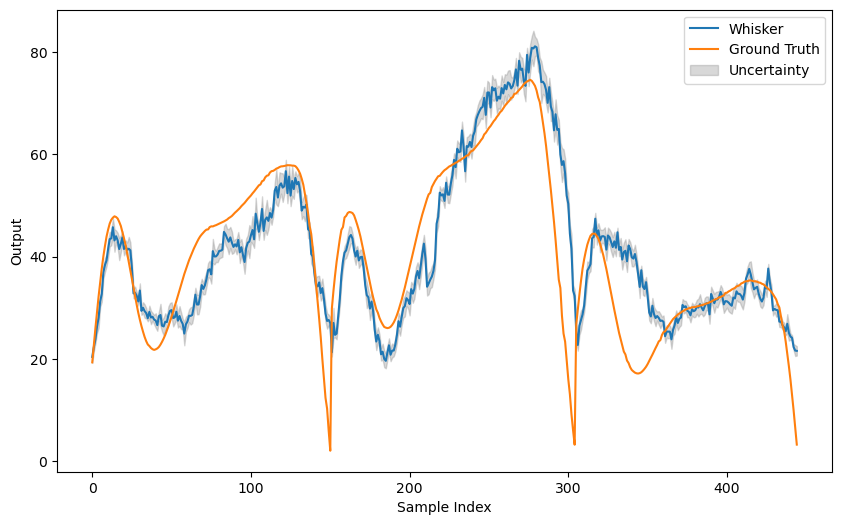

In [4]:
#whisker1 uncertainty aware mlp
from uncertainty import *
from model import *
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP_adf_dropout(input_size=3, hidden_size=32, output_size=1, p=0.05, noise_variance=0.01, min_variance=1e-3).to(device)
best_model_path='MLP_best_model_save/mlp_bs_32_lr_0.001_reg_0.001_do_0.1_rmse_9.1976_whisker1.pt'
model.load_state_dict(torch.load(best_model_path))
test_whisker_tensor = torch.Tensor(test_whisker1_filtered1)
test_GT_tensor = torch.Tensor(test_GT1_filtered)
test_dataset = TensorDataset(test_whisker_tensor, test_GT_tensor)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_image_folder = 'UA_MLP_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-3_modelvarianceweight_5_whisker1.png'
eval_time = time.time()
RMSE, MAE, neg_log_likelihood, test_pre1, test_uncertainty1 = evaluate(
        model,
        test_dataset,
        test_image_output_file,
        use_adf=True, 
        use_mcdo=True)

eval_time = time.time() - eval_time

print('RMSE                = {}'.format(RMSE))
print('MAE             = {}'.format(MAE))
print('Negative log-likelihood = {}'.format(neg_log_likelihood))
print('Time                    = {}'.format(eval_time))

MSE = 84.11089812909503
MAE = 6.531562276386207


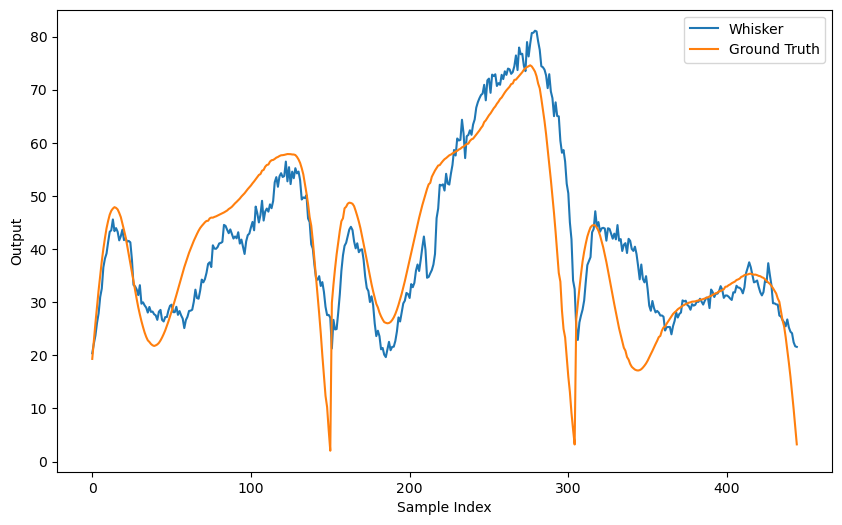

In [6]:
#KF whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre):
    kf = KalmanFilter(initial_state, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z in test_pre[1:]:
        kf.predict()
        kf.update(np.array([z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[10]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filter(initial_states[0], test_pre1_1)
test_kal1_2 = apply_kalman_filter(initial_states[1], test_pre1_2)
test_kal1_3 = apply_kalman_filter(initial_states[2], test_pre1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3

# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.5_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

MSE = 88.04165563081708
MAE = 6.600646061605953


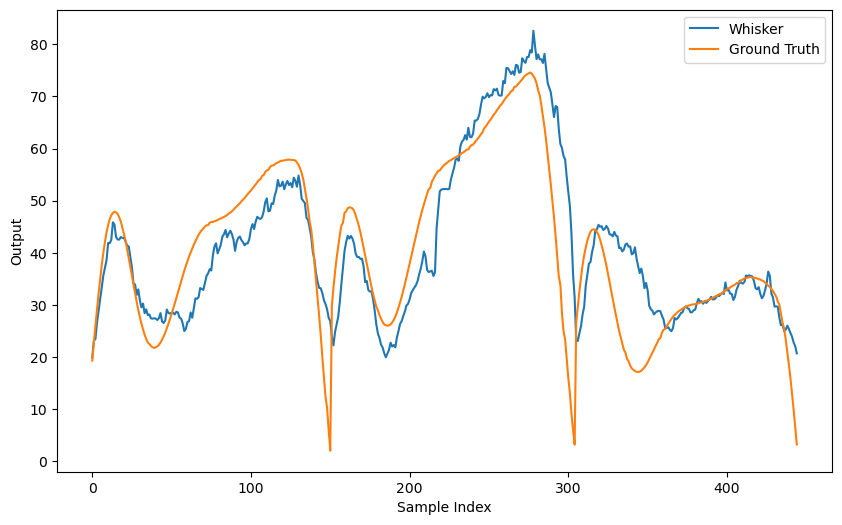

In [6]:
#uncertainty KF whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre, uncertainties):
    kf = KalmanFilterUA(initial_state, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty in zip(test_pre[1:], uncertainties[1:]):
        kf.predict()
        measurement_noise = np.array([[uncertainty]])  # 动态测量噪声
        kf.update(np.array([z]), measurement_noise)  # 传递动态噪声到更新步骤
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty1_1 = test_uncertainty1[0:151]
test_uncertainty1_2 = test_uncertainty1[151:305]
test_uncertainty1_3 = test_uncertainty1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filter(initial_states[0], test_pre1_1, test_uncertainty1_1)
test_kal1_2 = apply_kalman_filter(initial_states[1], test_pre1_2, test_uncertainty1_2)
test_kal1_3 = apply_kalman_filter(initial_states[2], test_pre1_3, test_uncertainty1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3

# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.1_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)


[array([20.374893], dtype=float32), array([22.55726402]), array([24.95525451]), array([27.49840464]), array([29.99218575]), array([32.47478919]), array([34.72834574]), array([37.06251851]), array([38.99847945]), array([40.64622654]), array([41.97012934]), array([43.19148602]), array([43.92103645]), array([44.5107067]), array([44.62800816]), array([44.46953225]), array([44.11449204]), array([43.29783564]), array([42.56012043]), array([41.66375622]), array([40.59022177]), array([39.59055475]), array([38.43028046]), array([37.20920112]), array([36.15403116]), array([34.9119886]), array([33.20917004]), array([31.687375]), array([30.41600873]), array([29.15139124]), array([28.41676633]), array([27.45017585]), array([26.75961325]), array([26.14753229]), array([25.72797801]), array([25.4138289]), array([25.57908326]), array([25.52325279]), array([25.60722055]), array([25.72317296]), array([26.00064757]), array([26.26817677]), array([26.75277988]), array([27.35595362]), array([27.79114808]), a

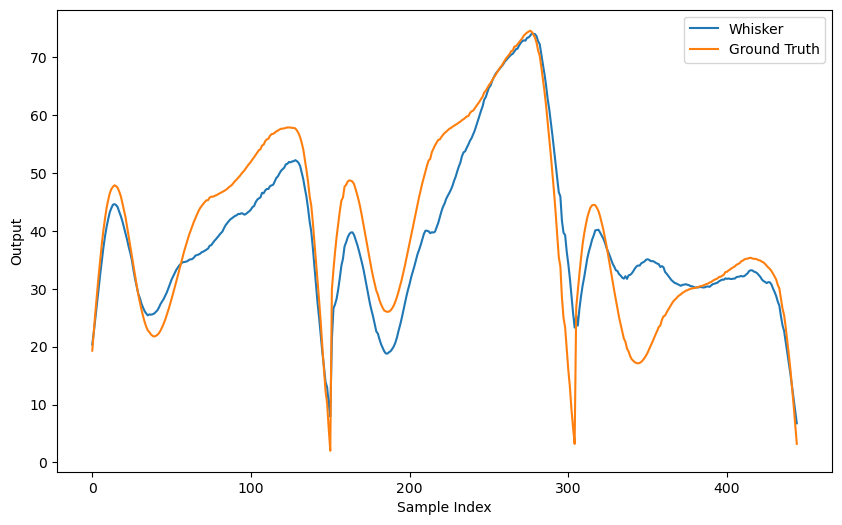

In [24]:
#KF Flat whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterFLAT(initial_state, initial_position, initial_yaw, test_pre, positions, yaws):
    kf = KalmanFilterFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z, position, yaw in zip(test_pre[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        kf.update(np.array([234 - z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]
test_position1_1 = test_position1_filtered[0:151]
test_position1_2 = test_position1_filtered[151:305]
test_position1_3 = test_position1_filtered[305:445]
test_yaw1_1 = test_orientation1_filtered[0:151]
test_yaw1_2 = test_orientation1_filtered[151:305]
test_yaw1_3 = test_orientation1_filtered[305:445]
# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_positions = [test_position1_1[0], test_position1_2[0], test_position1_3[0]]
initial_yaws = [test_yaw1_1[0], test_yaw1_2[0], test_yaw1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.01]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filterFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre1_1, test_position1_1, test_yaw1_1)
test_kal1_2 = apply_kalman_filterFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre1_2, test_position1_2, test_yaw1_2)
test_kal1_3 = apply_kalman_filterFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre1_3, test_position1_3, test_yaw1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3
print(test_kal1)
# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'FLAT_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([20.374893], dtype=float32), array([22.48541797]), array([24.83805571]), array([27.62698151]), array([30.53646243]), array([32.81573245]), array([35.1636236]), array([37.41330701]), array([39.29223682]), array([40.76421719]), array([42.09295541]), array([43.30303275]), array([44.00146317]), array([44.5662339]), array([44.74626747]), array([44.49466433]), array([44.10287611]), array([43.35440064]), array([42.60865927]), array([41.94786197]), array([40.9070632]), array([40.14778951]), array([39.01903624]), array([37.57101832]), array([36.64925851]), array([35.54800497]), array([33.57776386]), array([32.09796822]), array([31.19169718]), array([30.12234482]), array([29.33891285]), array([28.52944806]), array([27.90115494]), array([27.24504982]), array([26.98259171]), array([27.04061744]), array([27.11151201]), array([26.9398908]), array([27.18822579]), array([27.22252971]), array([27.35808365]), array([27.41673549]), array([27.87815847]), array([28.3642517]), array([28.4945236]), ar

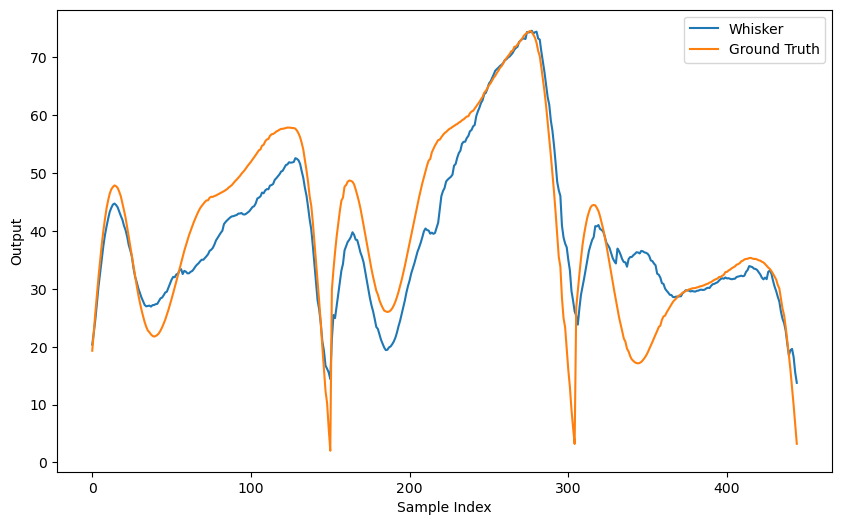

In [17]:
#UA KF Flat whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUAFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterUAFLAT(initial_state, initial_position, initial_yaw, test_pre, uncertainties, positions, yaws):
    kf = KalmanFilterUAFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty, position, yaw in zip(test_pre[1:], uncertainties[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        measurement_noise = np.array([[uncertainty]])
        kf.update(np.array([234 - z]), measurement_noise)
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]
test_position1_1 = test_position1_filtered[0:151]
test_position1_2 = test_position1_filtered[151:305]
test_position1_3 = test_position1_filtered[305:445]
test_yaw1_1 = test_orientation1_filtered[0:151]
test_yaw1_2 = test_orientation1_filtered[151:305]
test_yaw1_3 = test_orientation1_filtered[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty1_1 = test_uncertainty1[0:151]
test_uncertainty1_2 = test_uncertainty1[151:305]
test_uncertainty1_3 = test_uncertainty1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_positions = [test_position1_1[0], test_position1_2[0], test_position1_3[0]]
initial_yaws = [test_yaw1_1[0], test_yaw1_2[0], test_yaw1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.05]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filterUAFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre1_1, test_uncertainty1_1, test_position1_1, test_yaw1_1)
test_kal1_2 = apply_kalman_filterUAFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre1_2, test_uncertainty1_2, test_position1_2, test_yaw1_2)
test_kal1_3 = apply_kalman_filterUAFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre1_3, test_uncertainty1_3, test_position1_3, test_yaw1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3
print(test_kal1)
# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_FLAT_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

tensor([[27.7922],
        [25.3690],
        [29.8145],
        [32.6162],
        [34.6564],
        [36.8143],
        [39.1936],
        [42.2110],
        [47.1328],
        [47.9824],
        [53.9020],
        [53.3121],
        [57.8414],
        [57.8780],
        [55.3254],
        [57.0038],
        [53.8048],
        [56.5289],
        [53.2732],
        [52.7017],
        [51.0186],
        [49.6880],
        [49.5799],
        [48.0089],
        [47.1360],
        [45.9037],
        [44.7397],
        [43.2730],
        [43.6317],
        [43.5007],
        [43.3831],
        [40.8515]], device='cuda:0') tensor([19.4162, 22.9306, 26.3041, 29.4483, 32.6249, 35.4714, 38.2090, 40.6245,
        42.7263, 44.6563, 46.1223, 47.3967, 48.2679, 48.7970, 49.1928, 49.1999,
        49.0688, 48.5818, 47.9773, 46.9796, 45.9458, 44.7728, 43.4724, 41.8905,
        40.4189, 39.0021, 37.4630, 35.9302, 34.5633, 33.1849, 32.0239, 30.9426],
       device='cuda:0')
tensor([[8.4833],
        [2.

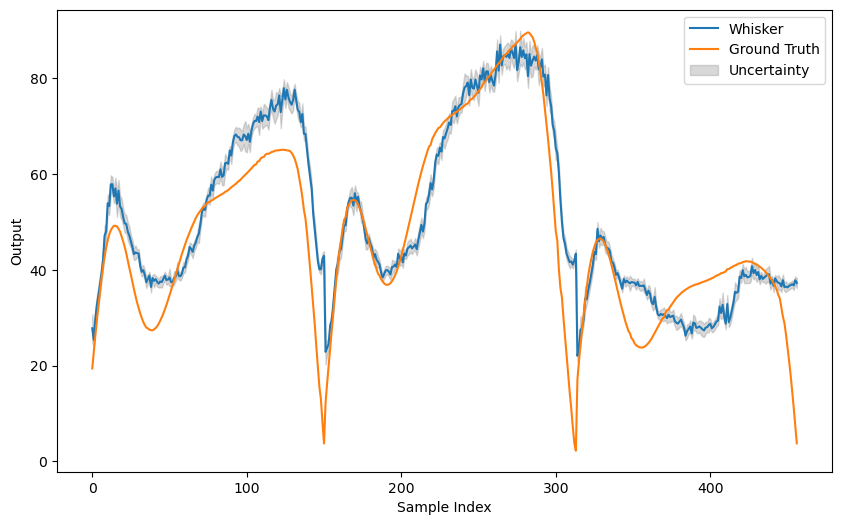

In [25]:
#whisker2 uncertainty aware mlp
from uncertainty import *
from model import *
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP_adf_dropout(input_size=3, hidden_size=32, output_size=1, p=0.05, noise_variance=0.01, min_variance=0.001).to(device)
best_model_path='MLP_best_model_save/mlp_bs_32_lr_0.001_reg_0.01_do_0.1_rmse_10.2471_whisker2.pt'
model.load_state_dict(torch.load(best_model_path))
test_whisker_tensor = torch.Tensor(test_whisker2_filtered1)
test_GT_tensor = torch.Tensor(test_GT2_filtered)
test_dataset = TensorDataset(test_whisker_tensor, test_GT_tensor)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_image_folder = 'UA_MLP_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2.png'
eval_time = time.time()
RMSE, MAE, neg_log_likelihood, test_pre2, test_uncertainty2 = evaluate(
        model,
        test_dataset,
        test_image_output_file,
        use_adf=True, 
        use_mcdo=True)

eval_time = time.time() - eval_time

print('RMSE                = {}'.format(RMSE))
print('MAE             = {}'.format(MAE))
print('Negative log-likelihood = {}'.format(neg_log_likelihood))
print('Time                    = {}'.format(eval_time))

[array([27.792246], dtype=float32), array([26.34761665]), array([29.73685022]), array([32.76539626]), array([35.59008271]), array([38.0681211]), array([40.47983513]), array([42.74202966]), array([45.12206294]), array([47.11688551]), array([49.18432798]), array([50.72559959]), array([52.22510516]), array([53.23776804]), array([53.7247873]), array([53.97866852]), array([53.73868476]), array([53.47426142]), array([52.79760575]), array([51.77261903]), array([50.64175691]), array([49.40469039]), array([48.09431953]), array([46.56395041]), array([45.17469718]), array([43.85405404]), array([42.43919341]), array([41.02329474]), array([39.94057062]), array([38.93947717]), array([38.2270786]), array([37.4185248]), array([36.69262513]), array([36.14417832]), array([35.72549389]), array([35.35863599]), array([35.42583906]), array([35.45349352]), array([35.37309417]), array([35.57117518]), array([35.88336834]), array([36.30217916]), array([36.70333859]), array([37.17436974]), array([37.72839099]), 

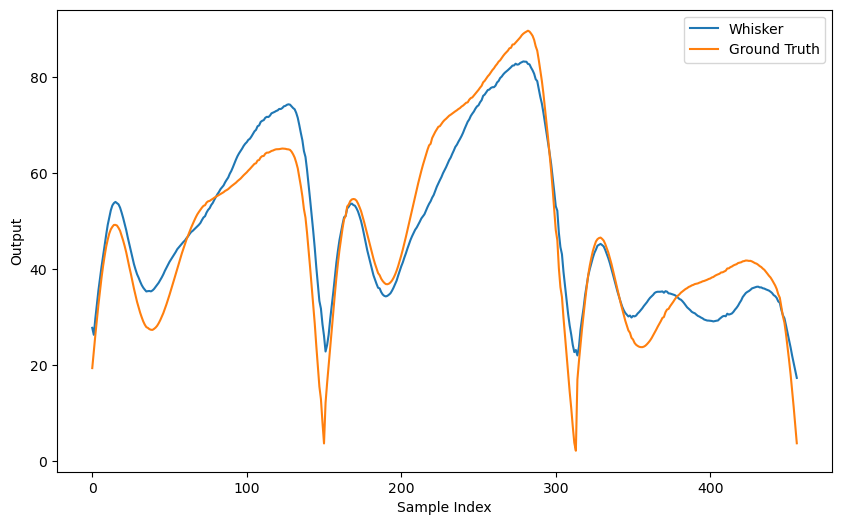

In [41]:
#KF Flat whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterFLAT(initial_state, initial_position, initial_yaw, test_pre, positions, yaws):
    kf = KalmanFilterFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z, position, yaw in zip(test_pre[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        kf.update(np.array([234 - z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:314]
test_GT2_filtered_3 = test_GT2_filtered[314:457]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:314]
test_pre2_3 = test_pre2[314:457]
test_position2_1 = test_position2_filtered[0:151]
test_position2_2 = test_position2_filtered[151:314]
test_position2_3 = test_position2_filtered[314:457]
test_yaw2_1 = test_orientation2_filtered[0:151]
test_yaw2_2 = test_orientation2_filtered[151:314]
test_yaw2_3 = test_orientation2_filtered[314:457]
# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_positions = [test_position2_1[0], test_position2_2[0], test_position2_3[0]]
initial_yaws = [test_yaw2_1[0], test_yaw2_2[0], test_yaw2_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.01]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filterFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre2_1, test_position2_1, test_yaw2_1)
test_kal2_2 = apply_kalman_filterFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre2_2, test_position2_2, test_yaw2_2)
test_kal2_3 = apply_kalman_filterFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre2_3, test_position2_3, test_yaw2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3
print(test_kal2)
# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'FLAT_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([27.792246], dtype=float32), array([27.39467503]), array([30.48151328]), array([33.34533543]), array([36.1822502]), array([38.63130029]), array([40.77275404]), array([42.99309534]), array([45.28587799]), array([47.2835391]), array([49.33959842]), array([50.8710911]), array([52.36816232]), array([53.5886517]), array([54.12063326]), array([54.23892336]), array([53.98206586]), array([53.62704194]), array([52.92870297]), array([51.87491901]), array([50.74115623]), array([49.49361693]), array([48.19790627]), array([46.67125056]), array([45.28445569]), array([44.14205279]), array([42.80159413]), array([41.55204673]), array([40.54420986]), array([40.51998261]), array([40.1962239]), array([39.27516923]), array([38.51384753]), array([37.96792101]), array([37.54164906]), array([37.01995786]), array([37.08017317]), array([37.28322073]), array([37.00863357]), array([37.36433443]), array([37.50429794]), array([37.8270537]), array([38.04157379]), array([38.20789432]), array([38.62343655]), ar

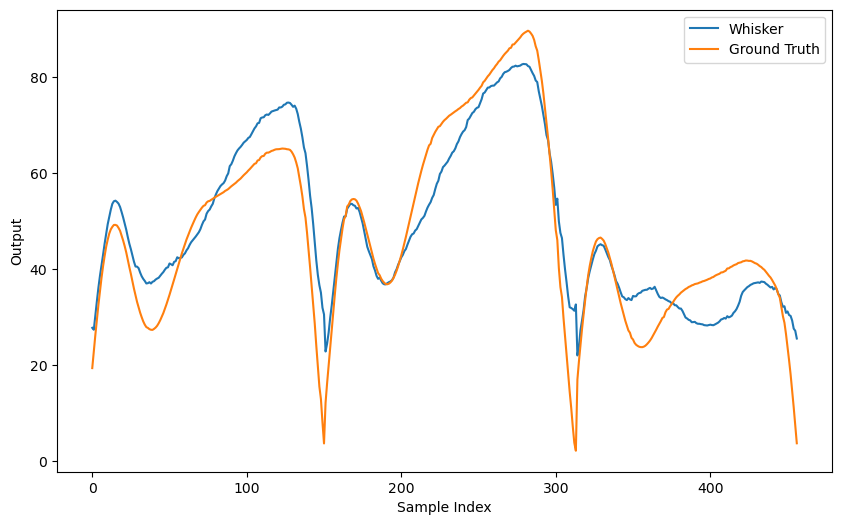

In [37]:
#UA KF Flat whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUAFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterUAFLAT(initial_state, initial_position, initial_yaw, test_pre, uncertainties, positions, yaws):
    kf = KalmanFilterUAFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty, position, yaw in zip(test_pre[1:], uncertainties[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        measurement_noise = np.array([[uncertainty]])
        kf.update(np.array([234 - z]), measurement_noise)
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:314]
test_GT2_filtered_3 = test_GT2_filtered[314:457]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:314]
test_pre2_3 = test_pre2[314:457]
test_position2_1 = test_position2_filtered[0:151]
test_position2_2 = test_position2_filtered[151:314]
test_position2_3 = test_position2_filtered[314:457]
test_yaw2_1 = test_orientation2_filtered[0:151]
test_yaw2_2 = test_orientation2_filtered[151:314]
test_yaw2_3 = test_orientation2_filtered[314:457]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty2_1 = test_uncertainty2[0:151]
test_uncertainty2_2 = test_uncertainty2[151:314]
test_uncertainty2_3 = test_uncertainty2[314:457]

# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_positions = [test_position2_1[0], test_position2_2[0], test_position2_3[0]]
initial_yaws = [test_yaw2_1[0], test_yaw2_2[0], test_yaw2_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.04]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filterUAFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre2_1, test_uncertainty2_1, test_position2_1, test_yaw2_1)
test_kal2_2 = apply_kalman_filterUAFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre2_2, test_uncertainty2_2, test_position2_2, test_yaw2_2)
test_kal2_3 = apply_kalman_filterUAFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre2_3, test_uncertainty2_3, test_position2_3, test_yaw2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3
print(test_kal2)
# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_FLAT_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2_kf_certainnoise_5_0.02_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

MSE = 92.81088828561488
MAE = 6.8889500115397935


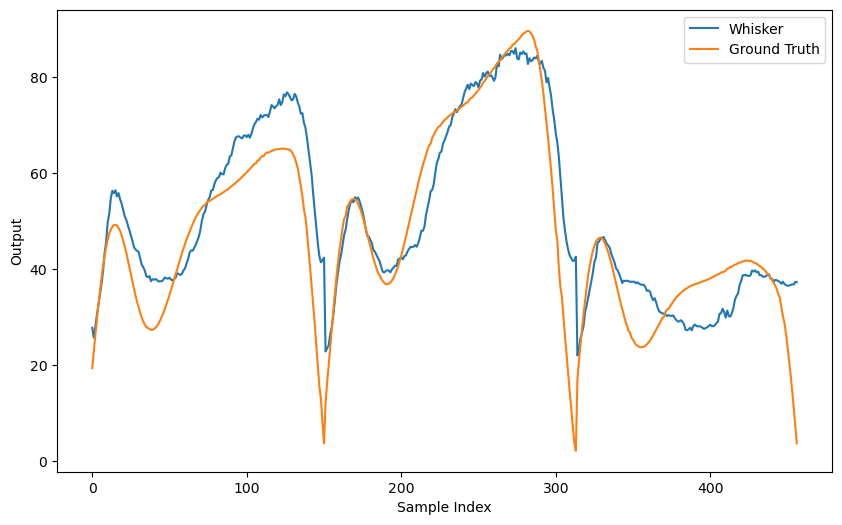

In [35]:
#KF whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre):
    kf = KalmanFilter(initial_state, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z in test_pre[1:]:
        kf.predict()
        kf.update(np.array([z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:314]
test_GT2_filtered_3 = test_GT2_filtered[314:457]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:314]
test_pre2_3 = test_pre2[314:457]

# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.5]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filter(initial_states[0], test_pre2_1)
test_kal2_2 = apply_kalman_filter(initial_states[1], test_pre2_2)
test_kal2_3 = apply_kalman_filter(initial_states[2], test_pre2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3

# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2_kf_certainnoise_5_0.5_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

MSE = 89.40935819270265
MAE = 6.800447638621097


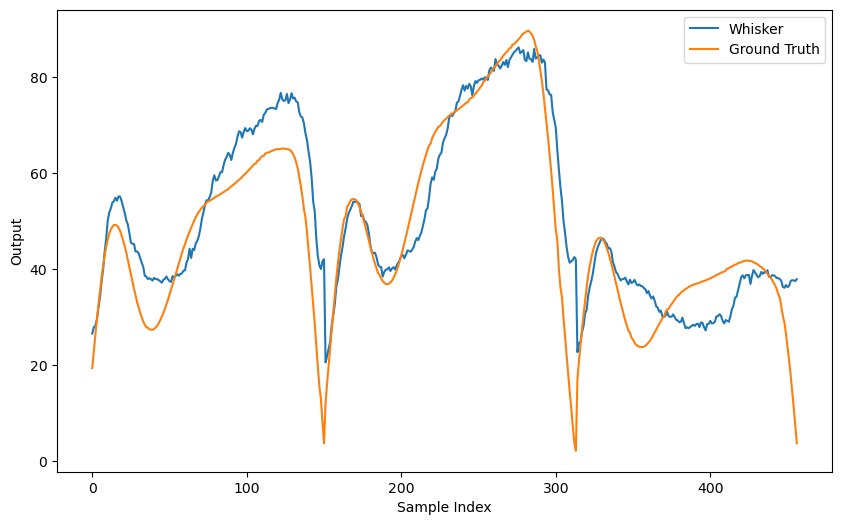

In [73]:
#uncertainty KF whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre, uncertainties):
    kf = KalmanFilterUA(initial_state, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty in zip(test_pre[1:], uncertainties[1:]):
        kf.predict()
        measurement_noise = np.array([[uncertainty]])  # 动态测量噪声
        kf.update(np.array([z]), measurement_noise)  # 传递动态噪声到更新步骤
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:314]
test_GT2_filtered_3 = test_GT2_filtered[314:457]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:314]
test_pre2_3 = test_pre2[314:457]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty2_1 = test_uncertainty2[0:151]
test_uncertainty2_2 = test_uncertainty2[151:314]
test_uncertainty2_3 = test_uncertainty2[314:457]

# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filter(initial_states[0], test_pre2_1, test_uncertainty2_1)
test_kal2_2 = apply_kalman_filter(initial_states[1], test_pre2_2, test_uncertainty2_2)
test_kal2_3 = apply_kalman_filter(initial_states[2], test_pre2_3, test_uncertainty2_3)
# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3

# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2_kf_UAnoise_5_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)